In [1]:
from IPython.display import YouTubeVideo

import math
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

# Session 1

## Introduction to X-ray attenuation and its implementation in ![gVXR](img/gvxr_logo.png)

## Authors: Franck Vidal and Jean-Michel L&eacute;tang

(version 1.0, 22 Sep 2022)

# Aims of this session

- Explain what gVXR is and why it has been developed;
- Introduce projection X-ray imaging and how X-rays are produced;
- Understand how X-rays interact with matter;
- Become familiar with the Beer-Lambert law to compute the attenuation of X-rays by matter.
- Describe how the Beer-Lambert law is implemented in [gVirtualXray](https://gvirtualxray.sourceforge.io/);
- Compare images simulated using [gVirtualXray](https://gvirtualxray.sourceforge.io/) with ground truth images.

# Acknowledgements

This notebook re-uses material from Jupyter Book by Jean-Michel L&eacute;tang: [*X-ray imaging: Physics, Instrumentation & Applications*](https://www.creatis.insa-lyon.fr/~letang/x-ray-book/physics.html).

# What is gVXR and why has it been developed?

# Medical Training using VR

## Timeline

- MSc on *Constructing a GUI using 3D reconstruction for a radiographer's training tool* (2002)
- MRes on *Modelling the response of x-ray detectors and removing artefacts in 3D tomography* (2003)
- PhD on *Simulation of image guided needle puncture: contribution to real-time ultrasound and fluoroscopic rendering* (start 2003)
- Postdoc *Development and validation of a virtual reality simulator for training in interventional radiological visceral needle puncture procedures*;

## Trend

- Create large amount of realistic simulated X-ray images;
- Development of VR apps to train Radiographers or Interventional Radiologists;
    - Take X-ray radiographs;
    - Stick needles and catheters in the human body whilst looking at images
    - Such as fluoroscopy, i.e. 
    - Real-time X-ray images on a TV screen.
- Not interested in scattering;
- Noise is not an issue;
- Ray-tracing is viable in this context.

# Why gVXR?

- Simulation of X-Ray attenuation extensively studied in physics;
- Different physically-based simulation code available;
- Physically-based simulation usually performed using Monte Carlo methods on CPU (often used in dosimetry for radiotherapy);
    - Very accurate; but
    - Computing an image requires a very very very long time (e.g. days or weeks);
- Ray-tracing is an alternative, but
    - Still relatively slow on CPU;
    - Does not easily take into account scattering;
        - Scattering does not necessarily matter in X-ray transmission imaging;
    - Does not include Poisson counting noise;
        - Poisson noise can be added as a post-process.

![gVXR](img/gvxr_logo.png) is not  a replacement for Monte Carlo methods, it's a complement when a trade-off between speed and accuracy must met.

# In a nutshell, gVirtualXRay (also known as gVXR) is

- an application programming interface (API);
- a C++ X-Ray simulation library;
- Open-source (with a flexible license):
    - Enable reproducible research;
    - Can be used in open-source projects;
    - Can be used in closed source commercial applications too.
- Realtime:
    - GPU implementation.
- Portable:
    - Run on GNU/Linux, Mac OS and Microsoft Windows
- Validated:
    - against Monte Carlo simulation when scattering can be ignored
- Flexible
    - Available for most popular programming languages (Python3, R, Ruby, Tcl, C#, Java, and GNU Octave);
    - Its Python package ["gVXR"](https://pypi.org/project/gVXR/) is listed on the [Python Package Index ![Pypi's logo](https://pypi.org/static/images/logo-small.95de8436.svg)](https://pypi.org/)
    - Uses polygon meshes to model 3-D geometries from popular file formats (eg. STL, PLY, 3DS, OBJ, DXF, X3D, DAE)

![Example of wireframe model](img/wireframe_model2.png)

# Simulation supports:

- Various source shapes
    - Point source;
    - Cube source;
    - Parallel beam.
- Incident beams:        
    - Monochromatic;
    - Polychromatic.
- Geometries:
    - Surface meshes (triangles);
    - Volume meshes (tetrahedrons). **NEW**
- Material properties:
    - Chemical elements (e.g. W for tungsten);
    - Compounds (e.g. H2O for water); **NEW**
    - Mixture (e.g. Ti90/Al6/V4); **NEW**
    - Hounsfield units (for medical applications).

# More recently

- Improved installation from source code;
- Supports [xraylib](https://github.com/tschoonj/xraylib) from [![ESRF](img/ESRF-logo.jpg)](https://www.esrf.eu/) for Photon Cross Sections;
- Installation from the Python Package Index using `pip install gvxr`;
- Containerisation using ![Docker](img/horizontal-logo-monochromatic-white.png);
- Converter from Abaqus files 2 STL files: **EXPERIMENTAL**
    - The simulation works with volumetric meshes (tetrahedrons),
    - With surface meshes (triangles)
- Always working on improvements (when time allows)
    - If you want a new feature, just drop me an email or open a [ticket on SourceForge](https://sourceforge.net/p/gvirtualxray/tickets/).

# Fact sheet

- SVN repository hosted by [![Sourceforge](img/sourceforge-logo.png)](https://sourceforge.net/)
    - [https://sourceforge.net/projects/gvirtualxray/](https://sourceforge.net/projects/gvirtualxray/)
    - Registered on 2013-12-01;
    - 2298 commits on 2022-08-10 (v2.0.1).
- Implemented in ![C++](img/cpp-logo.png) using ![OpenGL](img/OpenGL-logo.png)

| Language                            | files      |    blank  |      comment    |       code |
|-------------------------------------|------------|-----------|-----------------|------------|
|  C/C++ Header                       |     88     |   5585    | 12720           |  38687     |
|  C++                                |    117     |  11724    | 14024           |  33256     |
|  HTML  |  50  |  592  |  474  |  13100   | 
|  XML  |  5  |  0  |  0  |  12121   |  
|  TeX  |                                   17      |      986        |   747        |   5441 |
|  CMake  |  69  |  1410  |  1448  |  4490   | 
|  SWIG  |  2  |  736  |  516  |  4010   | 
|  Python  |  31  |  1383  |  1232  |  3541   | 
|  Markdown  |  22  |  767  |  0  |  2155   | 
|  GLSL  |  56  |  1029  |  2961  |  2060   | 
|  CSS  |  3  |  307  |  80  |  1481   | 
|  JavaScript |                             24    |        105         |   210          | 1107 |
|  XSD  |  2  |  101  |  10  |  1086   | 
|  CSV  |  7  |  1  |  0  |  379   | 
|  make  |  5  |  36  |  18  |  234   | 
|  Windows Module Definition |               1 |             0     |         0        |    183 |
|  Text  |  7  |  12  |  0  |  166   | 
|  Bourne Shell   |                         17   |          51       |      67     |       128 |
|  Java  |  1  |  15  |  24  |  51   | 
|  TOML  |  1  |  4  |  2  |  44   | 
|  Ruby  |  1  |  17  |  26  |  41   | 
|  C#  |    1  |           12         |    23        |     39 |
|  MATLAB  |  1  |  16  |  25  |  39   | 
|  R  |  1  |  14  |  26  |  35   | 
|  Perl  |  1  |  15  |  21  |  34   | 
|  Tcl/Tk         |                          1    |         15        |     24      |       33 |
|  DOS Batch                 |               1        |      4        |      0     |        20 |
|  XSLT  |  1  |  0  |  5  |  10   | 
|  SUM:  |                                 533    |      24937       |   34683      |   123971 |

```bash
cloc --report-file=/home/fpvidal/PROGRAMMING/gvirtualxray-code/gvxr-code.txt ~/Downloads/gvirtualxray-code-r2298-trunk.zip

sed "s/\([A-Z]*[a-z]*\)[   ]*\([0-9]*\)[   ]*\([0-9]*\)[   ]*\([0-9]*\)[   ]*\([0-9]*\)/|  \1  |  \2  |  \3  |  \4  |  \5   | /" < /home/fpvidal/PROGRAMMING/gvirtualxray-code/gvxr-code.txt

```

# Examples of applications that use gVirtualXRay

- [Teaching particle physics to undergraduates](https://doi.org/10.1088/1361-6404/ab5011);
- Virtual Reality Simulation;
- [Virtual Testing Lab](https://doi.org/10.5281/zenodo.1452506)
- [Design new clinical imaging modality to reduce dose exposure](https://doi.org/10.1109/ACCESS.2019.2895925)
- [Teaching radiography in medicine](https://doi.org/10.2312/cgvc.20191267)

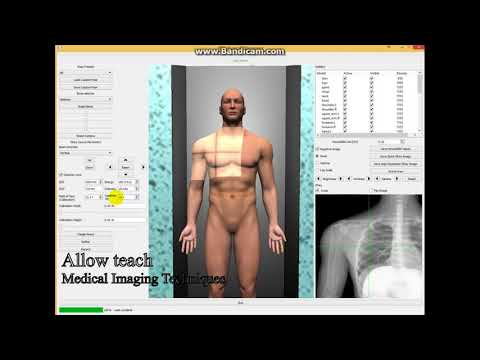

In [3]:
YouTubeVideo('sXB-9fG2AbU', width=800, height=300)

# 3D &mu;-tomography of tungsten fibre

- Studied how/why artefacts in some CT volumes occurred.
- Using synchrotron radiation at the European Synchrotron Radiation Facilities (ESRF) in Grenoble, France.
- "Investigation of artefact sources in synchrotron microtomography via virtual X-ray imaging". Vidal, F.P.; L&eacute;tang, J.M.; Peix, G.; Cloetens, P. In: *Nuclear Instruments and Methods in Physics Research Section B: Beam Interactions with Materials and Atoms*, Vol. 234, No. 3, 01.06.2005, p. 333-348. [DOI: 10.1016/j.nimb.2005.02.003](https://doi.org/10.1016/j.nimb.2005.02.003)

| View from Mount Jalla on the ESRF and ILL in Grenoble | Scanned object  |  CT slice |
|-------------------------------------------------------|---|---|
| ![](img/Esrf_grenoble.jpg) |  ![](img/sample.png)   |   ![](img/CT_ref_annotated.png)   |
| Source: Photograph by German Wikipedian Christian Hendrich, October 2004 |   |   |

# Use of fast realistic simulations on GPU to extract CAD models from microtomographic data in the presence of strong CT artefacts

Vidal, Franck; Mitchell, Iwan; Letang, J.M. In: *Precision Engineering*, Vol. 74, 01.03.2022, p. 110-125. [DOI: 10.1016/j.precisioneng.2021.10.014](https://doi.org/10.1016/j.precisioneng.2021.10.014)

# Registration of the TiAlV matrix

In [4]:
%%HTML
<video width="320" height="240" controls>
  <source src="videos/1-s2.0-S0141635921002609-mmc7.mp4" type="video/mp4">
</video>

# Evolution of the core and fibre radii during the optimisation

In [ ]:
%%HTML
<video width="320" height="240" controls>
  <source src="videos/1-s2.0-S0141635921002609-mmc6.mp4" type="video/mp4">
</video>

# Evolution of beam spectrum parameters during the optimisation.

In [ ]:
%%HTML
<video width="320" height="240" controls>
  <source src="videos/1-s2.0-S0141635921002609-mmc2.mp4" type="video/mp4">
</video>

# Evolution of the core and fibre radii and phase contrast parameters during the optimisation

In [ ]:
%%HTML
<video width="320" height="240" controls>
  <source src="videos/1-s2.0-S0141635921002609-mmc4.mp4" type="video/mp4">
</video>

# Principles of rojection X-ray imaging

![](img/dragon2.jpg)

# X-ray production: X-ray tube

![X-ray tube principle: William Coolidge in 1913](img/x-ray_tube.jpg)

- Electrons in a heated filament (with a current of a few mA typically)
- are extracted using a very high voltage (several tens of kV typically).
- Their kinetic energy is close to 0 in the filament (they can be considered at rest).
- Therefore their kinetic energy reach keV just before impinging onto the anode target.
- From electron-matter interactions in the target follow X-ray mostly produced by Bremsstrahlung but also to a lesser extent Fluorescence. 

# X-ray production: Synchrotron

![ESRF](img/Esrf_grenoble.jpg)

Source: Photograph by German Wikipedian Christian Hendrich, October 2004

# How do X-rays interact with matter?


- X-photons cross matter;
- During their path into any material, they can interact with matter.

![*Illustration of X-ray photon/matter interaction*](img/interactions.png)

1. Directly transmitted photons (no interaction);
2. Absorbed photons;
3. Scattered photons;
4. Absorbed scattered photons.

**For most X-rays imaging modalities, only directly transmitted photons are essential:**

- Scattered photons decrease the image quality;
- Absorbed photons do not reach the detector;
- Scattered photons may be ignored (but not necessarily).

![*Illustration of X-ray photon/matter interaction*](img/interactions.png)

1. Directly transmitted photons (no interaction);
2. Absorbed photons;
3. Scattered photons;
4. Absorbed scattered photons.

# Beer-Lambert law to compute the attenuation of X-rays by matter

- also known as (Attenuation Law)
- $N_{out}(E) = N_{in}(E) \times \mathrm{e}^{-\sum_i \mu_i(E, \rho, Z) L_p(i)}$

![*Illustration of the Beer-Lambert law*](img/attenuation.png)

  - $N_{in}(E)$ the number of incident photons at energy $E$;
  - $N_{out}(E)$ the number of transmitted photons of energy $E$;
  - $\mu_i$ the linear attenuation coefficient (in cm<sup>-1</sup>) of the $i$<sup>th</sup> object. It depends on:
    - $E$ the energy of incident photons;
    - $\rho$ the material density of the object;
    - $Z$ the atomic number of the object material.
  - $L_p(i)$ the path length of the ray in the $i$<sup>th</sup> object.
- $E_{out} = N_{out}(E) \times E$
  - $E_{out}$ the energy received by the pixel, i.e. as recorded in the X-ray image.

# Linear attenuation coefficient

The linear [attenuation coefficient](https://www.creatis.insa-lyon.fr/~letang/x-ray-book/physics.html#attenuation-coefficient) $\mu$ appears in the Beer-Lambert [Attenuation law](https://www.creatis.insa-lyon.fr/~letang/x-ray-book/physics.html#attenuation-law) which gives the number of directly transmitted photons $N$ (i.e. without interaction) in terms of the number of incident photons $N_0$:
$$
N_{\mathrm{dt}}(E)=N_0(E)\exp(-\mu(E)X)
$$
where $X$ is the thickness of the traversed material. This expression is only valid for photons which have the same energy $E$.

In [6]:
%matplotlib widget
import utilities
import ipywidgets as widgets
widgets.interact_manual(utilities.mu,material=widgets.Dropdown(options=[('Polyethylene','H2C'),('Water','H2O'),('Aluminium','Al'),('Copper','Cu'),('Yttrium','Y'),('Tin','Sn'),('Lead','Pb')],value="H2C",layout={'width': 'max-content'},description='Material:',style={'description_width': 'initial'}));

interactive(children=(Dropdown(description='Material:', layout=Layout(width='max-content'), options=(('Polyeth…

# Attenuation of 500 photons of 100 keV by 1cm of copper

In the previous cell, 
1. Select copper as material
2. Click on `Run Interact`
3. Using the mouse cursor, find what the total linear attenuation coefficient of copper is for 100 keV,
4. Replace `???` in the cell below with the corresponding value
5. In the cell below, compute $$N_{\mathrm{dt}}(E)=N_0(E)\exp(-\mu(E)X)$$
    - with $E$ = 100 keV,
    - $N_0(E)$ = 500
    - $X$ = 1 and
    - $\mu(E)$ the value you wrote down

In [8]:
mu_Cu = 4.1167 # Linear attenuation of copper at 100 keV

In [9]:
N_0 = 500 # Number of incident photons
X_Cu = 1 # Thickness in cm

N_dt = N_0 * math.exp(-mu_Cu * X_Cu)
print("Out of", N_0, "photons, only", round(N_dt), "are transmitted")

Out of 500 photons, only 8 are transmitted


# Attenuation of 500 photons of 100 keV by ??cm of water

- We know that $$N_{\mathrm{Cu}}=500 \times \exp(-\mu_{Cu} \times 1) = 8$$
- We want to illustrate than water does not attenuate X-rays of 100 keV as much as copper.
- Repeat some of the previous steps to find the what the total linear attenuation coefficient of water is for 100 keV.
- The Beer-Lambert law in this case is:
$$N_{\mathrm{H_2O}}= 500 \times \exp(-\mu_{H_2O} \times x) = 8$$
- What is the value of $x$?

In [10]:
X_H2O = None # Thickness in cm, it is unknown
mu_H2O = 1.7043E-1 # Linear attenuation of water at 100 keV

$$500 \times \exp(-\mu_{H_2O} \times x_{H_2O}) = N_{\mathrm{H_2O}} = 8$$
$$\exp(-\mu_{H_2O} \times x_{H_2O}) = \frac{N_{\mathrm{H_2O}}}{500}$$
$$-\mu_{H_2O} \times x_{H_2O} = \ln\left(\frac{N_{\mathrm{H_2O}}}{500}\right)$$
$$\mu_{H_2O} \times x_{H_2O} = -\ln\left(\frac{N_{\mathrm{H_2O}}}{500}\right)$$
$$x_{H_2O} = \frac{-\ln\left(\frac{N_{\mathrm{H_2O}}}{500}\right)}{\mu_{H_2O}}$$

In [11]:
X_H2O = (-math.log(N_dt / 500)) / mu_H2O
print(round(X_H2O), "cm of water is needed to stop as many photons of 100 keV as", X_Cu,"cm of copper")

24 cm of water is needed to stop as many photons of 100 keV as 1 cm of copper


# Check if we made a mistake

In [12]:
N_dt = N_0 * math.exp(-mu_H2O * X_H2O)
print("Out of", N_0, "photons, only", round(N_dt), "are transmitted")

Out of 500 photons, only 8 are transmitted


# What does it have to do with gVirtualXray?

**Given $E$, $L_p$ and $\mu$, we can compute X-ray images.**

- Computational bottlenecks are:
    - computing $L_p$ from polygon meshes
    - the exponential,
    - the summations
- gVirtualXray provides real-time mechanisms to compute them on GPU.

# Path Length: Naive Approach

![*Is finding intersections in the right order important?*](img/intersections.png)

1. Detect every intersection between a ray and the objects;
2. Sort intersection
(Can be handled by GPUs using depth-peeling, a multi-pass rendering technique for semi-transparent polygonal objects without sorting polygons);
3. Compute path length.

# Path Length: L-Buffer

![*Finding intersections in any order does not matter*](img/l-buffer.png)

**Intersection sorting is actually not needed!**

- By convention normals are outward;
- A ray penetrates into an object when the dot product between the view vector (V) and the normal (N<sub>i</sub>) at the intersection point is positive;
- It leaves an object when the dot product is negative.

# L-Buffer Implementation

L<sub>p</sub>=&Sigma;<sub>i</sub> - sng(V &middot; N<sub>i</sub>) x d<sub>i</sub>


- i refers to i<sup>th</sup> intersection in an arbitrary order;
- d<sub>i</sub> distance from X-ray source to intersection point;
- sgn(V &middot; N<sub>i</sub>) stands for the sign of the dot product between V and N<sub>i</sub>;
- In a shader program [^1] , compute:
    - sgn(V &middot; N<sub>i</sub>);
    - d<sub>i</sub> the distance between the X-ray source and the intersection;
    - Assign -sng(V &middot; N<sub>i</sub>) x d<sub>i</sub> as the fragment value.
- For each pixel, compute L<sub>p</sub> thanks to high-dynamic range and OpenGL blending function (pixel values may not be between 0 and 1)[^2].

[^1]: In OpenGL a shader program is a small program that is usually run in with a GPU in parallel on every pixel of an image.

[^2]: See [DOI: 10.2312/LocalChapterEvents/TPCG/TPCG09/025-032](http://dx.doi.org/10.2312/LocalChapterEvents/TPCG/TPCG09/025-032) for more details.

# Multipass Rendering Pipeline

pixel = E x N<sub>out</sub>

pixel =  <span style="color:green">E x N<sub>in</sub>(E) e</span><sup>(<span style="color:red">-&Sigma;<sub>i</sub> &mu;<sub>i</sub> </span> <span style="color:blue">  L<sub>p</sub>(i)</span>)</sup>

- Needs 3 FBOs with high-dynamic range capability for off-line rendering:

- For each object of the scene:
  1. Compute L<sub>p</sub>(i);
  2. Update results of &Sigma; &mu;<sub>i</sub> L<sub>p</sub>(i).
- For the final image only:
  1. Compute N<sub>out</sub>;
  2. (Optional when direct display only is needed).

![*OpenGL pipeline to compute the Beer-Lambert law (monochromatic case).*](img/pipeline1.png)

# Quantitative Validation

- Simulating an image relies on a Beer-Lambert law implementation;
- Solving the Beer-Lambert law relies on Linear Attenuation Coefficients; (&mu;)
- &mu; is not known for given incident energies;
- &mu; is computed using Mass Attenuation Coefficients (&mu;/&rho;) and material density (&rho;).
- **Are the values used in gVirtualXRay accurate?**
    - Compare values computed in gVirtualXRay with those from the literature.
- **Are the Beer-Lambert law implementations accurate?**
    - Compare values computed in gVirtualXRay with theoretical ones.
- **Are the simulated images accurate?**
    - Compare images computed using gVirtualXRay with those using a state-of-the-art Monte Carlo software, e.g.

    [![Geant4](./img/g4logo-web.png)](https://geant4.web.cern.ch/)

# Density for Different Materials (human tissues)

| From the Literature | Computed by gVirtualXRay |
|---------------------|--------------------------|
| ![](img/rho_reference.png) | ![](img/rho_reference.png) |
| *Image from  Physics in Medicine & Biology, vol. 45, no. 2, p. 459, 2000. doi:[10.1088/0031-9155/45/2/314](http://doi.org/10.1088/0031-9155/45/2/314)*] |  |

# Mass Attenuation Coefficients (medical)

- Any tissue can be described by its Hounsfiled Unit (HU):
  - $HU(material) = 1000 \times \frac{\mu(material) - \mu_{H2O}}{\mu_{H2O}}$
- Given a HU value for any simulated object;
  - If $\mu_{H2O}$ is known for any energy,
  - then $\mu(material)$ for any HU and for any energy can be computed:
      - $\mu(material) = \frac{HU(material) \times \mu_{H2O}}{1000} + \mu_{H2O}$
- Mass attenuation coefficients ($\frac{\mu}{\rho}$) for various human tissues can be found in the literature;
- The density ($\rho$) for various human tissues can be found in the literature.
- **Linear attenuation coefficients can therefore be computed for various human tissues** and
- **used to solve the Beer-Lambert law**

# Mass Attenuation Coefficients: Tissue, Soft (ICRU-44)

- ![*Image from [https://physics.nist.gov/PhysRefData/XrayMassCoef/ComTab/tissue.html](https://physics.nist.gov/PhysRefData/XrayMassCoef/ComTab/tissue.html)*](./img/tissue.png)

- &mu;(water) from literature is provided at given energies only: Interpolation needed for missing energies

  - ![*Image computed with gVirtualXRay using linear interpolation*](./img/test_soft_tissue_1.png)

  - ![*Image computed with gVirtualXRay using interpolation in the log scale*](./img/test_soft_tissue_2.png)

# Mass Attenuation Coefficients: Bone, Cortical (ICRU-44)

- ![*Image from [https://physics.nist.gov/PhysRefData/XrayMassCoef/ComTab/bone.html](https://physics.nist.gov/PhysRefData/XrayMassCoef/ComTab/bone.html)*](img/bone.png)

- &mu;(water) from literature is provided at given energies only: Interpolation needed for missing energies

  - ![*Image computed with gVirtualXRay using linear interpolation*](./img/test_bone_1.png)

  - ![*Image computed with gVirtualXRay using interpolation in the log scale*](./img/test_bone_2.png)

**Not a good match as the peaks are not visible in &mu;(water)**

- ![*Image computed with gVirtualXRay using NIST's XCOM database*](./img/test_bone_3.png)

**This is now a good match**

# Going back to previous slide

- Simulating an image relies on a Beer-Lambert law implementation;
- Solving the Beer-Lambert law relies on Linear Attenuation Coefficients; (&mu;)
- &mu; is not known for given incident energies;
- &mu; is computed using Mass Attenuation Coefficients (&mu;/&rho;) and material density (&rho;).
- **Are the values used in gVirtualXRay accurate?**
    - Compare values computed in gVirtualXRay with those from the literature.

# Going back to previous slide

- Simulating an image relies on a Beer-Lambert law implementation;
- Solving the Beer-Lambert law relies on Linear Attenuation Coefficients; (&mu;)
- &mu; is not known for given incident energies;
- &mu; is computed using Mass Attenuation Coefficients (&mu;/&rho;) and material density (&rho;).
- **Are the values used in gVirtualXRay accurate?**
    - Compare values computed in gVirtualXRay with those from the literature.
    - **YES**



# More testing

- **Are the Beer-Lambert law implementations accurate?**
    - Compare values computed in gVirtualXRay with theoretical ones.
- **Are the simulated images accurate?**
    - Compare images computed using gVirtualXRay with those using a state-of-the-art Monte Carlo software, e.g.

    [![Geant4](img/g4logo-web.png)](https://geant4.web.cern.ch/)




# Test case

![*Simulated object*](./img/validation_3D_scene.png)

- Cube: edge length of 3 cm, made of soft tissue (HU = 52).
- Cylinder: height of 3 m, diameter of 2 cm, made of bone (HU = 1330).


# Gate vs. gVirtualXRay

We simulate a test case twice:

- Using a Monte Carlo method for particle physics implemented in [GATE](http://www.opengatecollaboration.org/);
- Using our GPU implementation.

*GATE is an opensource software developed by an international collaboration. Its focus is on Monte Carlo simulation in medical imaging and radiotherapy. GATE makes use of the Geant4 libraries. Geant 4 is CERN's Monte Carlo simulation platform dedicated to particle physics in nuclear research. CERN is the European Organization for Nuclear Research.*



# Gate vs. gVirtualXRay

| Simulation parameters | Image computed with GATE (2 weeks of computations on supercomputer) | Image computed with gVirtualXRay (less than 1 sec. of computations on GPU) |
|---|---|---|
| ![*Simulation parameters*](./img/POINT_SOURCE/scene.png) | ![*Image computed with GATE (2 weeks of computations on supercomputer)*](./img/POINT_SOURCE/gate_norm.png) | ![*Image computed with gVirtualXRay (less than 1 sec. of computations on GPU)*](./img/POINT_SOURCE/gpu_norm.png) |

Normalised cross-correlation (NCC) = 99.747&percnt;

![*Profiles*](img/POINT_SOURCE/test_profile.png)

# Real digital radiograph (DR) taken with a clinically utilised X-ray equipment vs. gVirtualXRay

| Lungman phantom | 3D model of the phantom, source and detector|
|-----------------|----------| 
| ![](img/lungman.png) | ![](img/lungman_model.png) |


![](./img/lungman-projection-harder.png)

![](img/lungman-profiles-projection-postprocessing.png)